# Project Name: Weather Risk Management 

## Model Number : 1

## Description: Model for Predicting the Temperature from the National Oceanic and Atmospheric Administration data scraped from NOAA website

## Installing Necesaary Libraries for Plotting Graphs, Dealing with Datasets etc.,

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= (20,7)

In [2]:
dataset= pd.read_csv('wrhCHI.csv')

In [3]:
dataset.head(2)

,Unnamed: 0,Date(PDT),Temp(F),DewPoint(F),RelativeHumidity(%),WindDirection,WindSpeed(MPH),Visibility(miles),Weather,Clouds,StationPressure(inches),Sea LevelPressure(mb),AltimeterSetting(inches),6 HrMax(F),6 HrMin(F),24 HrMax(F),24 HrMin(F)
0,1,26 Oct 11:53 am,58,29,33,WNW,6,10.0,NaN,"FEW060,OVC200",29.81,1021.3,30.17,NaN,NaN,NaN,NaN
1,2,26 Oct 10:53 am,57,29,34,WNW,3,10.0,NaN,"FEW050,BKN200",29.80,1021.3,30.16,57.0,48.0,NaN,NaN


## MongoDB API and Storing the Data Frame in to the MongoDB

In [7]:
dataset_json= dataset.to_json(orient= 'records')

In [9]:
from bson import json_util
data = json_util.loads(dataset_json)

In [10]:
import pymongo 
mng_client = pymongo.MongoClient('localhost', 27017)
mng_db = mng_client['noaa'] 
collection_name = 'noaa_data'
db_cm = mng_db[collection_name]
 
#Insert Data
db_cm.insert(data)

C:\Users\saikarthik\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  


[ObjectId('5fdd41a7fdff00f8d661779c'),
 ObjectId('5fdd41a7fdff00f8d661779d'),
 ObjectId('5fdd41a7fdff00f8d661779e'),
 ObjectId('5fdd41a7fdff00f8d661779f'),
 ObjectId('5fdd41a7fdff00f8d66177a0'),
 ObjectId('5fdd41a7fdff00f8d66177a1'),
 ObjectId('5fdd41a7fdff00f8d66177a2'),
 ObjectId('5fdd41a7fdff00f8d66177a3'),
 ObjectId('5fdd41a7fdff00f8d66177a4'),
 ObjectId('5fdd41a7fdff00f8d66177a5'),
 ObjectId('5fdd41a7fdff00f8d66177a6'),
 ObjectId('5fdd41a7fdff00f8d66177a7'),
 ObjectId('5fdd41a7fdff00f8d66177a8'),
 ObjectId('5fdd41a7fdff00f8d66177a9'),
 ObjectId('5fdd41a7fdff00f8d66177aa'),
 ObjectId('5fdd41a7fdff00f8d66177ab'),
 ObjectId('5fdd41a7fdff00f8d66177ac'),
 ObjectId('5fdd41a7fdff00f8d66177ad'),
 ObjectId('5fdd41a7fdff00f8d66177ae'),
 ObjectId('5fdd41a7fdff00f8d66177af'),
 ObjectId('5fdd41a7fdff00f8d66177b0'),
 ObjectId('5fdd41a7fdff00f8d66177b1'),
 ObjectId('5fdd41a7fdff00f8d66177b2'),
 ObjectId('5fdd41a7fdff00f8d66177b3'),
 ObjectId('5fdd41a7fdff00f8d66177b4'),
 ObjectId('5fdd41a7fdff00

## Initial Descriptive Analysis of NOAA Data

In [11]:
dataset.describe()

,Unnamed: 0,Temp(F),DewPoint(F),RelativeHumidity(%),Visibility(miles),StationPressure(inches),Sea LevelPressure(mb),AltimeterSetting(inches),6 HrMax(F),6 HrMin(F),24 HrMax(F),24 HrMin(F)
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.00000,150.000000,25.000000,25.000000,6.000000,6.000000
mean,75.500000,66.946667,43.286667,44.653333,8.973333,29.530267,1011.80600,29.888133,73.440000,61.240000,81.000000,56.500000
std,43.445368,9.738036,6.027161,13.897992,1.694629,0.078986,2.81435,0.081524,9.201811,7.400901,6.324555,3.563706
min,1.000000,48.000000,24.000000,21.000000,4.000000,29.400000,1007.10000,29.750000,57.000000,48.000000,71.000000,52.000000
25%,38.250000,60.000000,41.000000,34.250000,8.000000,29.470000,1009.80000,29.830000,67.000000,56.000000,77.750000,54.000000
50%,75.500000,66.000000,45.000000,44.000000,10.000000,29.520000,1011.50000,29.880000,74.000000,61.000000,82.000000,56.500000
75%,112.750000,74.750000,48.000000,53.750000,10.000000,29.570000,1013.30000,29.930000,80.000000,66.000000,85.500000,59.750000
max,150.000000,88.000000,50.000000,80.000000,10.000000,29.810000,1021.30000,30.170000,88.000000,76.000000,88.000000,60.000000


## Finding Correlation Value Between Variables 

In [12]:
dataset.corr()

,Unnamed: 0,Temp(F),DewPoint(F),RelativeHumidity(%),Visibility(miles),StationPressure(inches),Sea LevelPressure(mb),AltimeterSetting(inches),6 HrMax(F),6 HrMin(F),24 HrMax(F),24 HrMin(F)
Unnamed: 0,1.000000,0.543356,0.430759,-0.255639,-0.435098,-0.641199,-0.653154,-0.643013,0.644779,0.593608,0.980379,0.944941
Temp(F),0.543356,1.000000,0.403797,-0.709070,-0.024895,-0.576998,-0.586172,-0.580740,0.766780,0.794199,0.973064,0.863455
DewPoint(F),0.430759,0.403797,1.000000,0.335701,-0.177976,-0.695884,-0.689976,-0.690044,0.506408,0.462839,0.638000,0.513185
RelativeHumidity(%),-0.255639,-0.709070,0.335701,1.000000,-0.073060,0.076079,0.089382,0.083479,-0.417261,-0.448949,0.188052,0.094200
Visibility(miles),-0.435098,-0.024895,-0.177976,-0.073060,1.000000,0.211645,0.209568,0.207558,0.064501,0.113423,-0.387298,-0.481140
StationPressure(inches),-0.641199,-0.576998,-0.695884,0.076079,0.211645,1.000000,0.998482,0.999188,-0.681414,-0.763905,-0.739284,-0.864929
Sea LevelPressure(mb),-0.653154,-0.586172,-0.689976,0.089382,0.209568,0.998482,1.000000,0.999227,-0.688170,-0.771568,-0.746892,-0.870544
AltimeterSetting(inches),-0.643013,-0.580740,-0.690044,0.083479,0.207558,0.999188,0.999227,1.000000,-0.685067,-0.771428,-0.731344,-0.857272
6 HrMax(F),0.644779,0.766780,0.506408,-0.417261,0.064501,-0.681414,-0.688170,-0.685067,1.000000,0.927755,NaN,NaN
6 HrMin(F),0.593608,0.794199,0.462839,-0.448949,0.113423,-0.763905,-0.771568,-0.771428,0.927755,1.000000,NaN,NaN


## EDA- Scatter Plot Temperature vs StationPressure (Inches)

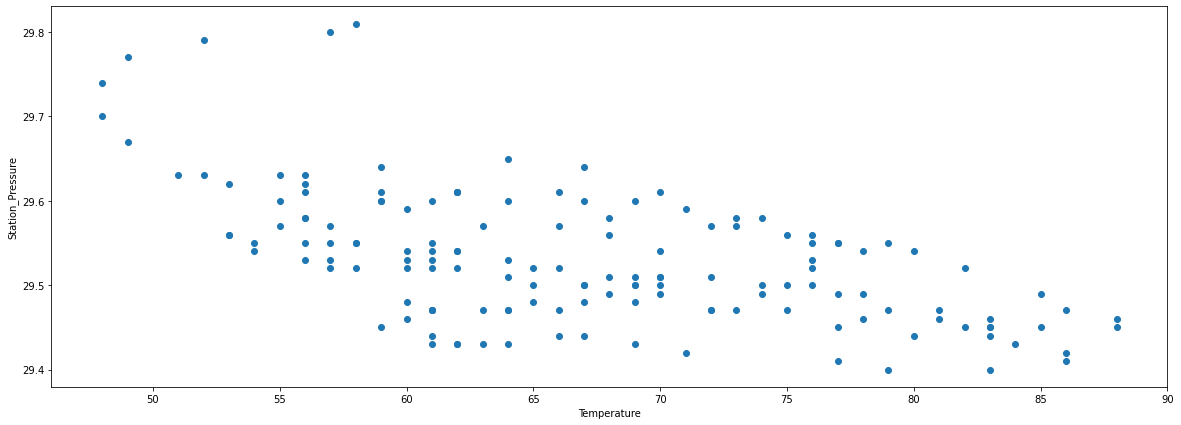

In [13]:
plt.figure()
plt.scatter(dataset['Temp(F)'] , dataset['StationPressure(inches)'])
plt.ylabel('Station_Pressure')
plt.xlabel('Temperature')
plt.rcParams['figure.figsize']= (20,7)

## Feature Selection and Extraction 

In [14]:
Dataset_Predict= dataset.drop(columns=["Unnamed: 0","Date(PDT)","6 HrMax(F)","WindSpeed(MPH)","AltimeterSetting(inches)","Visibility(miles)","WindDirection","Weather","Clouds","6 HrMin(F)","24 HrMax(F)", "24 HrMin(F)"])
Dataset_Predict.head()

Target_LR= Dataset_Predict.drop(columns= ["DewPoint(F)", "StationPressure(inches)","Sea LevelPressure(mb)","RelativeHumidity(%)"])
Input_LR= Dataset_Predict.drop(columns= ["Temp(F)"])

In [15]:
Dataset_Predict.head(2)

,Temp(F),DewPoint(F),RelativeHumidity(%),StationPressure(inches),Sea LevelPressure(mb)
0,58,29,33,29.81,1021.3
1,57,29,34,29.80,1021.3


## Finding Null Values 

In [16]:
Dataset_Predict.isnull().sum()

Temp(F)                    0
DewPoint(F)                0
RelativeHumidity(%)        0
StationPressure(inches)    0
Sea LevelPressure(mb)      0
dtype: int64

## Standardizing the Inputs and Targets


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Input_LR)
scaler.fit(Target_LR)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
Input_LR_scaled = scaler.transform(Input_LR)
Target_LR_scaled = scaler.transform(Target_LR)

## Necessary Libraries for Model Building

In [19]:
#!pip install xgboost

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
#from xgboost import XGBRegressor

## Test / Train Split 

In [21]:
x_train, x_test, y_train, y_test = train_test_split(Input_LR_scaled, Target_LR_scaled, test_size=0.2, random_state=365)

## Linear Modelling

In [22]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
y_pred = reg.predict(x_train)

## Linear Model Evaluation

In [24]:
LR_MAE = print("Linear Regression - Mean Absolute Error: ", metrics.mean_absolute_error(y_train, y_pred)) 
LR_MSE = print("Linear Regression - Mean Square Error: ", metrics.mean_squared_error(y_train, y_pred)) 
LR_RMSE = print("Linear Regression - Root Mean Square Error: ", np.sqrt(metrics.mean_squared_error(y_train, y_pred)))


score = r2_score(y_train, y_pred)
print("R^2:", score)

Linear Regression - Mean Absolute Error:  0.1177648098892317
Linear Regression - Mean Square Error:  0.025304810964489045
Linear Regression - Root Mean Square Error:  0.15907485962429463
R^2: 0.9703821661093449


In [25]:
LR = pd.DataFrame({'Model_Name':['Linear Regression'],'MAE':[metrics.mean_absolute_error(y_train, y_pred)],
                   'MSE': [metrics.mean_squared_error(y_train, y_pred)],
                   'RMSE': [metrics.mean_squared_error(y_train, y_pred)],
                    'R^2': [r2_score(y_train, y_pred)]})

In [26]:
LR

,Model_Name,MAE,MSE,RMSE,R^2
0,Linear Regression,0.117765,0.025305,0.025305,0.970382


## Scatter Plot between Targets and the Predictions Linear Model

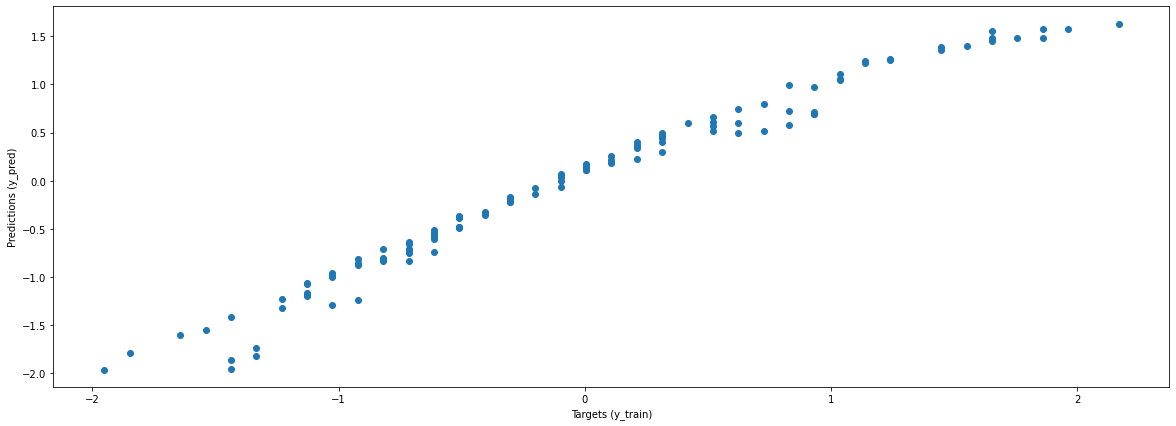

In [27]:
plt.scatter(y_train, y_pred)
plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_pred)')
plt.show()

## KNN- Regressor 

In [28]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [29]:
y_pred = knn.predict(x_train)

## KNN Model Evaluation

In [30]:
print("KNN- Regressor - Mean Absolute Error: ", metrics.mean_absolute_error(y_train, y_pred)) 
print("KNN- Regressor - Mean Square Error: ", metrics.mean_squared_error(y_train, y_pred)) 
print("KNN- Regressor - Root Mean Square Error: ", np.sqrt(metrics.mean_squared_error(y_train, y_pred)))


score = r2_score(y_train, y_pred)
print("R^2:", score)

KNN- Regressor - Mean Absolute Error:  0.09616518739933146
KNN- Regressor - Mean Square Error:  0.016030208036477627
KNN- Regressor - Root Mean Square Error:  0.1266104578479899
R^2: 0.9812375583629804


In [31]:
KNN = pd.DataFrame({'Model_Name':['KNN Regressor'],
                    'MAE':[metrics.mean_absolute_error(y_train, y_pred)],
                   'MSE': [metrics.mean_squared_error(y_train, y_pred)],
                   'RMSE': [metrics.mean_squared_error(y_train, y_pred)],
                    'R^2': [r2_score(y_train, y_pred)]})

In [32]:
KNN

,Model_Name,MAE,MSE,RMSE,R^2
0,KNN Regressor,0.096165,0.01603,0.01603,0.981238


## Scatter Plot between Targets and the Predictions- KNN Regressor Model

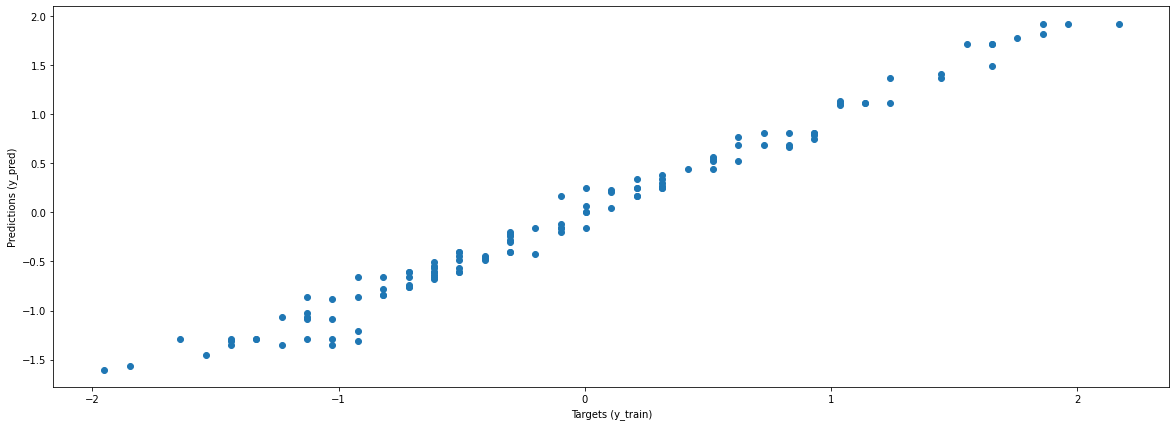

In [33]:
plt.scatter(y_train, y_pred)
plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_pred)')
plt.show()

## Decision Tree Regressor 

In [34]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [35]:
y_pred = dt.predict(x_train)

## Decision Tree Regressor Model Evaluation 

In [36]:
print("DT- Regressor - Mean Absolute Error: ", metrics.mean_absolute_error(y_train, y_pred)) 
print("DT- Regressor - Mean Square Error: ", metrics.mean_squared_error(y_train, y_pred)) 
print("DT- Regressor - Root Mean Square Error: ", np.sqrt(metrics.mean_squared_error(y_train, y_pred)))


score = r2_score(y_train, y_pred)
print("R^2:", score)

DT- Regressor - Mean Absolute Error:  8.326672684688674e-18
DT- Regressor - Mean Square Error:  1.5407439555097887e-33
DT- Regressor - Root Mean Square Error:  3.925231146709438e-17
R^2: 1.0


In [37]:
DT = pd.DataFrame({'Model_Name':['Decision Tree Regressor'],
                   'MAE':[metrics.mean_absolute_error(y_train, y_pred)],
                   'MSE': [metrics.mean_squared_error(y_train, y_pred)],
                   'RMSE': [metrics.mean_squared_error(y_train, y_pred)],
                   'R^2': [r2_score(y_train, y_pred)]})

In [38]:
DT

,Model_Name,MAE,MSE,RMSE,R^2
0,Decision Tree Regressor,8.326673e-18,1.540744e-33,1.540744e-33,1.0


## Scatter Plot between Targets and the Predictions- DT Regressor Model

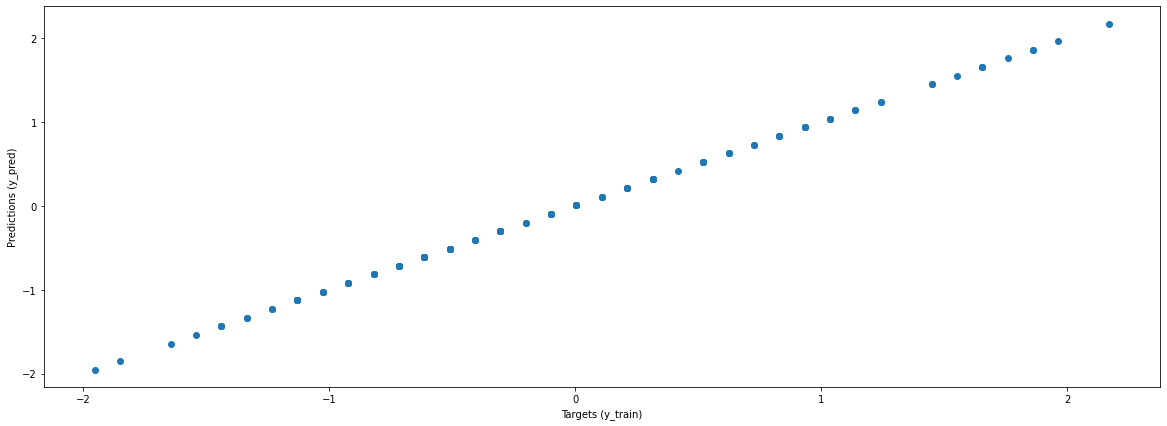

In [39]:
plt.scatter(y_train, y_pred)
plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_pred)')
plt.show()

## Random Forest Regressor 

In [40]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)

C:\Users\saikarthik\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [41]:
y_pred = rf.predict(x_train)

## Random Forest Regressor Model Evaluation 

In [42]:
print("RF- Regressor - Mean Absolute Error: ", metrics.mean_absolute_error(y_train, y_pred)) 
print("RF- Regressor - Mean Square Error: ", metrics.mean_squared_error(y_train, y_pred)) 
print("RF- Regressor - Root Mean Square Error: ", np.sqrt(metrics.mean_squared_error(y_train, y_pred)))


score = r2_score(y_train, y_pred)
print("R^2:", score)

RF- Regressor - Mean Absolute Error:  0.05197213208287087
RF- Regressor - Mean Square Error:  0.005187055070311155
RF- Regressor - Root Mean Square Error:  0.07202121264121533
R^2: 0.9939288487209113


In [43]:
RF= pd.DataFrame({'Model_Name':['Random Forest Regressor'],
                  'MAE':[metrics.mean_absolute_error(y_train, y_pred)],
                   'MSE': [metrics.mean_squared_error(y_train, y_pred)],
                   'RMSE': [metrics.mean_squared_error(y_train, y_pred)],
                   'R^2': [r2_score(y_train, y_pred)]})

In [44]:
RF

,Model_Name,MAE,MSE,RMSE,R^2
0,Random Forest Regressor,0.051972,0.005187,0.005187,0.993929


## Scatter Plot between Targets and the Predictions- RF Regressor Model

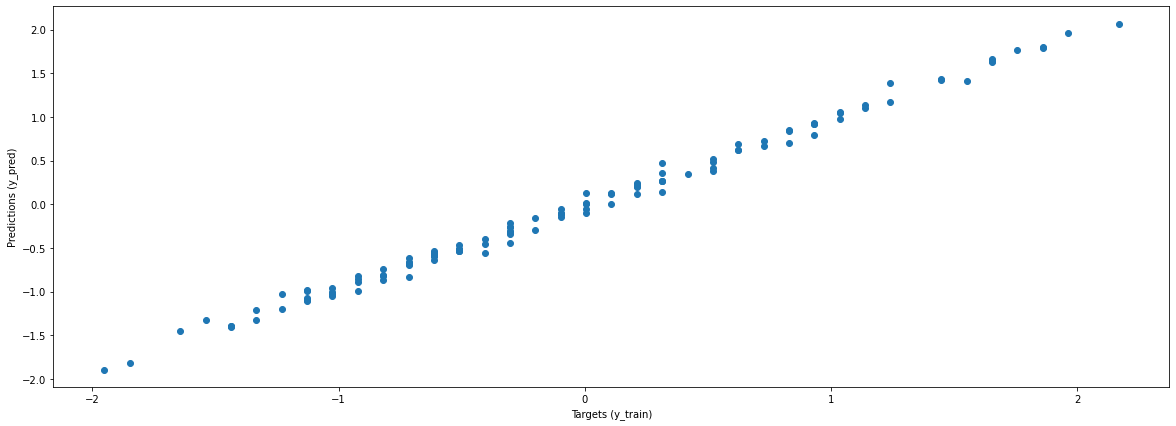

In [45]:
plt.scatter(y_train, y_pred)
plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_pred)')
plt.show()

## Ridge Regression 

In [46]:
rid = Ridge()
rid.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [47]:
y_pred = rid.predict(x_train)

## Ridge Regression Model Evaluation 

In [48]:
print("RR - Mean Absolute Error: ", metrics.mean_absolute_error(y_train, y_pred)) 
print("RR - Mean Square Error: ", metrics.mean_squared_error(y_train, y_pred)) 
print("RR - Root Mean Square Error: ", np.sqrt(metrics.mean_squared_error(y_train, y_pred)))


score = r2_score(y_train, y_pred)
print("R^2:", score)

RR - Mean Absolute Error:  0.124166308196023
RR - Mean Square Error:  0.026421640678797553
RR - Root Mean Square Error:  0.16254734903651166
R^2: 0.9690749808073501


In [49]:
RR = pd.DataFrame({'Model_Name':['Ridge Regression'],
                   'MAE':[metrics.mean_absolute_error(y_train, y_pred)],
                   'MSE': [metrics.mean_squared_error(y_train, y_pred)],
                   'RMSE': [metrics.mean_squared_error(y_train, y_pred)],
                   'R^2': [r2_score(y_train, y_pred)]})

In [50]:
RR

,Model_Name,MAE,MSE,RMSE,R^2
0,Ridge Regression,0.124166,0.026422,0.026422,0.969075


## Scatter Plot between Targets and the Predictions- RR Model

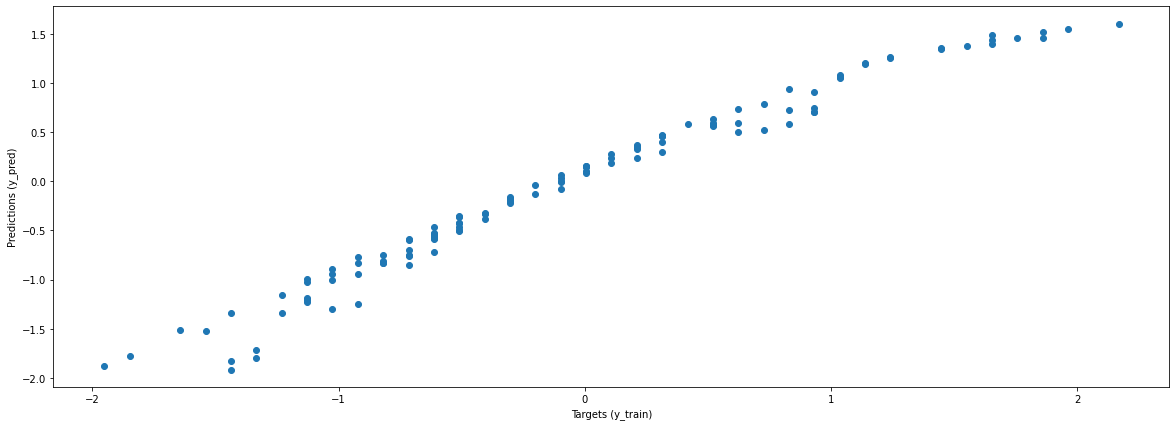

In [51]:
plt.scatter(y_train, y_pred)
plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_pred)')
plt.show()

## Lasso Regression 

In [52]:
las = Lasso()
las.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [53]:
y_pred = las.predict(x_train)

## Lasso Regression Model Evaluation

In [54]:
print("LR - Mean Absolute Error: ", metrics.mean_absolute_error(y_train, y_pred)) 
print("LR - Mean Square Error: ", metrics.mean_squared_error(y_train, y_pred)) 
print("LR - Root Mean Square Error: ", np.sqrt(metrics.mean_squared_error(y_train, y_pred)))


score = r2_score(y_train, y_pred)
print("R^2:", score)

LR - Mean Absolute Error:  0.7630535896588024
LR - Mean Square Error:  0.8543775030243895
LR - Root Mean Square Error:  0.9243254313413591
R^2: 0.0


In [55]:
LaR = pd.DataFrame({'Model_Name':['Lasso Regression'],
                   'MAE':[metrics.mean_absolute_error(y_train, y_pred)],
                   'MSE': [metrics.mean_squared_error(y_train, y_pred)],
                   'RMSE': [metrics.mean_squared_error(y_train, y_pred)],
                    'R^2': [r2_score(y_train, y_pred)]})

In [56]:
LaR

,Model_Name,MAE,MSE,RMSE,R^2
0,Lasso Regression,0.763054,0.854378,0.854378,0.0


## Scatter Plot between Targets and the Predictions- LaR Model

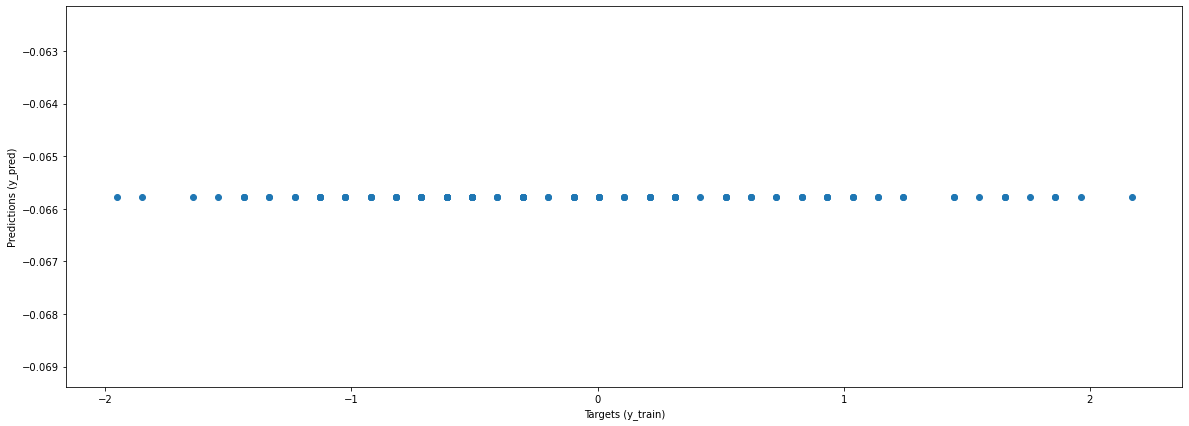

In [57]:
plt.scatter(y_train, y_pred)
plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_pred)')
plt.show()

## Comparision of Different linear Models and their Respective Results

In [58]:
frames = [LR,KNN,DT,RF,RR,LaR]
Models_Results = pd.concat(frames)
Models_Results.reset_index(drop=True, inplace=True)

In [59]:
Models_Results

,Model_Name,MAE,MSE,RMSE,R^2
0,Linear Regression,1.177648e-01,2.530481e-02,2.530481e-02,0.970382
1,KNN Regressor,9.616519e-02,1.603021e-02,1.603021e-02,0.981238
2,Decision Tree Regressor,8.326673e-18,1.540744e-33,1.540744e-33,1.000000
3,Random Forest Regressor,5.197213e-02,5.187055e-03,5.187055e-03,0.993929
4,Ridge Regression,1.241663e-01,2.642164e-02,2.642164e-02,0.969075
5,Lasso Regression,7.630536e-01,8.543775e-01,8.543775e-01,0.000000


## Visualization of Various Model Results

                Model_Name           MAE           MSE          RMSE       R^2
0        Linear Regression  1.177648e-01  2.530481e-02  2.530481e-02  0.970382
1            KNN Regressor  9.616519e-02  1.603021e-02  1.603021e-02  0.981238
2  Decision Tree Regressor  8.326673e-18  1.540744e-33  1.540744e-33  1.000000
3  Random Forest Regressor  5.197213e-02  5.187055e-03  5.187055e-03  0.993929
4         Ridge Regression  1.241663e-01  2.642164e-02  2.642164e-02  0.969075
5         Lasso Regression  7.630536e-01  8.543775e-01  8.543775e-01  0.000000


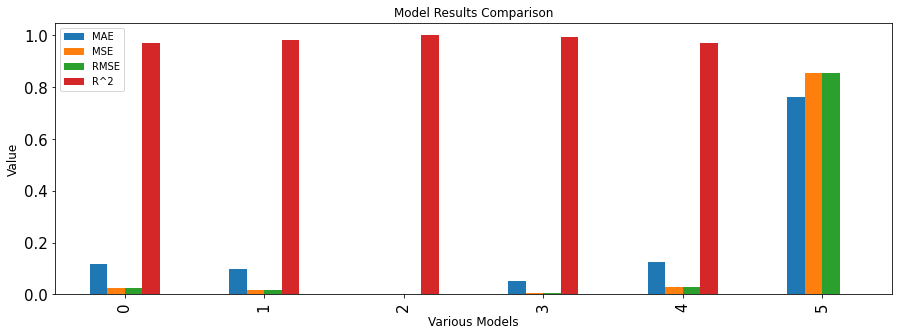

In [60]:
print(Models_Results)
mr = Models_Results[['MAE','MSE','RMSE','R^2']].plot(kind='bar', title ="Model Results Comparison", figsize=(15, 5), legend=True, fontsize=15)
mr.set_xlabel("Various Models", fontsize=12)
mr.set_ylabel("Value", fontsize=12)
plt.show()

### Overall Random Forest and Decision Tree tops the list when compared with other algorithms respectively with accuracy more than 99 Percentage. 